Denoising autoencodes removes noises from the dataset

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D, Input, UpSampling2D

In [23]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

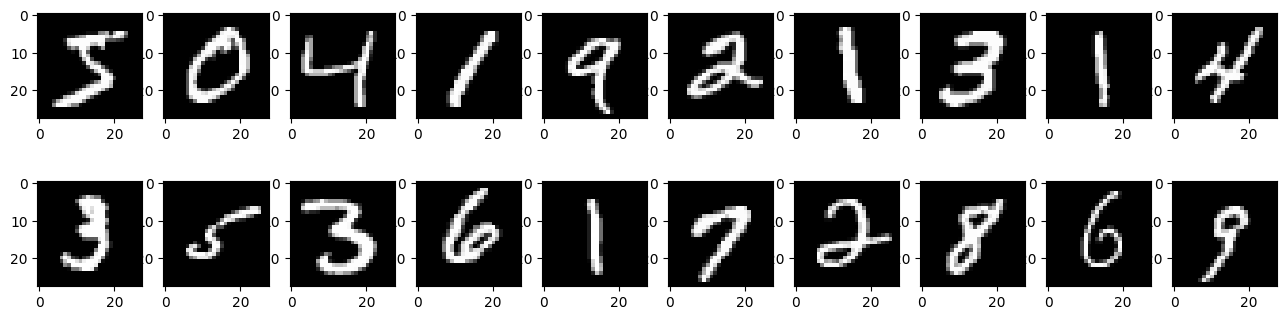

In [24]:
import matplotlib.pyplot as plt
def plot_image(dataset):
  fig, axes = plt.subplots(2, 10, figsize = (16, 4))
  count = 0
  for i in range(2): #for row
    for j in range(10):  #for column
      axes[i, j].imshow(dataset[count], cmap = 'gray')
      count+=1

plot_image(X_train)

In [25]:
# normalizing
X_train = X_train / 255
X_test = X_test / 255

Adding noise in our dataset

In [26]:
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_train.shape)
X_test_noise = X_test + noise_factor * np.random.normal(loc = 0., scale = 1., size = X_test.shape)

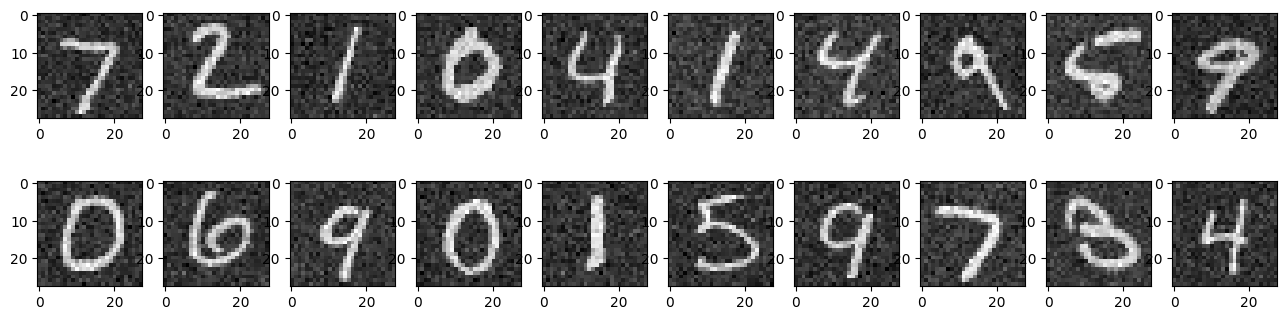

In [27]:
plot_image(X_test_noise)

Reshaping to 3d tensor

In [28]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1 )
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1 )

X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 28, 28, 1 )
X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 28, 28, 1 )

In [14]:
from keras.models import Model
from keras.layers import  Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

Encoder

In [15]:
encoder_input = Input(shape = X_train.shape[1:])
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(pool_size = (2,2), padding = 'same')(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(pool_size = (2,2), padding = 'same')(x)

Decoder

In [16]:
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
x = Conv2D(32, (3,3), activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, (3,3), activation = 'sigmoid', padding = 'same')(x)

In [17]:
autoencoder = Model(encoder_input, decoded, name = 'Denoising_Model')
autoencoder.summary()

Model: "Denoising_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 32)   

In [18]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [ ]:
checkpoint = ModelCheckpoint("denoising_model.h5", save_best_only=True, save_weights_only=False, verbose = 1)
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 50, callbacks = checkpoint, validation_split = 0.2)

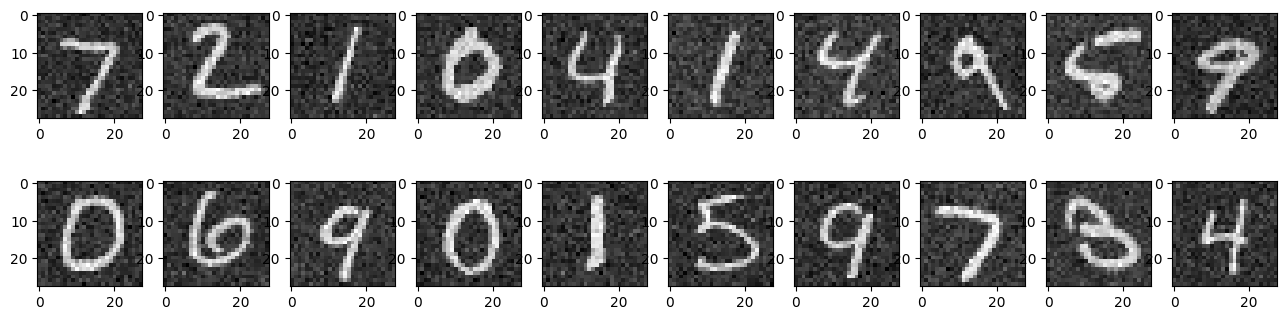

In [30]:
X_test_noise = X_test_noise.reshape(X_test.shape[0], 28, 28)
plot_image(X_test_noise)

313/313 [==============================] - 2s 5ms/step


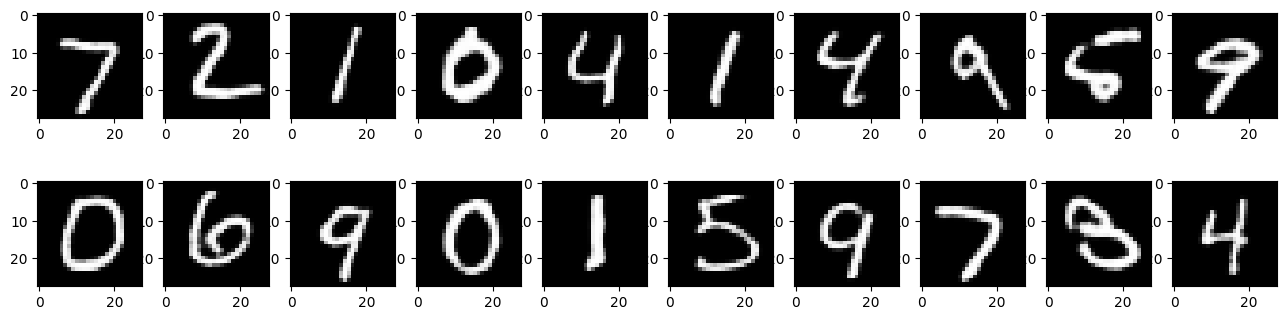

In [31]:
pred = autoencoder.predict(X_test_noise)
pred = pred.reshape(pred.shape[0], 28, 28)
plot_image(pred)